<a href="https://colab.research.google.com/github/jsleeg98/deeplearning_from_scratch/blob/main/ch5_%EC%98%A4%EC%B0%A8%EC%97%AD%EC%A0%84%ED%8C%8C%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오차역전파법
이전에는 가중치 매개변수에 대한 손실함수의 기울기를 수치미분을 활용하여 구했습니다. 이는 단순하고 구현하기 쉽지만 계산시간이 오래걸린다는 단점이 있습니다.

따라서 가중치 매개변수의 기울기를 효율적으로 계산하는 오차역전파를 소개합니다.


# 5.1 계산 그래프
이는 계산 과정을 그래프로 나타낸 것으로 node와 edge를 활용하여 표현합니다.

이는 나중에 복잡한 문제를 만났을 때 큰 위력을 발휘합니다.

## 5.1.1 계산 그래프로 풀다
문제 1

현빈 군은 슈퍼에서 1개에 100원인 사과를 2개 샀습니다. 이때 지불 금액을 구하세요. 단, 소비세가 10% 부과됩니다.

다음을 이 문제를 계산 그래프로 푼 것입니다.

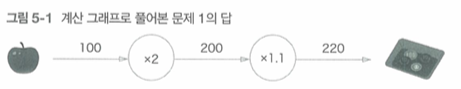


한 노드의 연산을 곱하기 또는 더하기로만 생각한다면 다음과 같습니다.

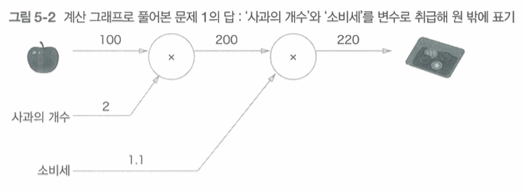

문제 2

현빈 군은 슈퍼에서 사과를 2개, 귤을 3개 샀습니다. 사과는 1개에 100원, 귤은 1개에 150원입니다. 소비세가 10%일 때 지불 금액을 구하세요.

다음 문제를 계산그래프로 표현하면 다음과 같습니다.

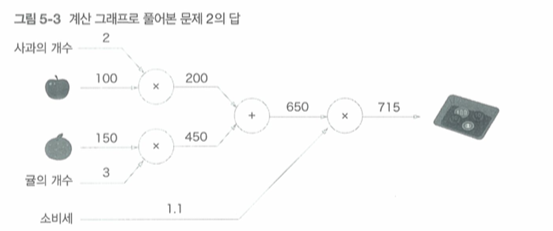

지금까지 계산 그래프를 이용한 문제풀이는 다음 흐름으로 진행합니다.

1. 계산 그래프를 구성한다.
2. 그래프에서 계산을 왼쪽에서 오른쪽으로 진행한다.

이때 왼쪽에서 오른쪽으로 진행되는 계산을 순전파(forward propagation)이라고 합니다.

## 5.1.2 국소적 계산

계산 그래프의 특징은 '국소적 계산'을 전파함으로써 최종 결과를 얻는다는 점에 있습니다.

이는 각 노드는 자신과 관련한 계산만 하고 다른 부분은 신경쓰지 않아도 되는 것을 말합니다.

계산 그래프의 장점
1. 전체가 아무리 복잡해도 각 노드에서는 단순한 계산에 집중하여 문제를 단순화할 수 있다.
2. 중간 계산 결과를 모두 보관할 수 있다.
3. 역전파(back propagation)을 통해 '미분'을 효율적으로 계산할 수 있다.  

문제 1를 이용하여 역전파를 설명해보겠습니다

문제 1은 사과를 2개 사서 소비세를 포함한 최종 금액을 구하는 것이었는데 여기서 사과 가격이 오르면 최종 금액에 어떤 영향을 끼치는지 알고 싶다고 한다면, 이는 '사과 가격에 대한 지불 금액의 미분'을 구하는 것과 같다.

이를 기회로 나타내면 $\frac{∂{L}}{\partial{x}}$입니다.

이를 계산 그래프로 역전파를 표현하면 다음과 같습니다.

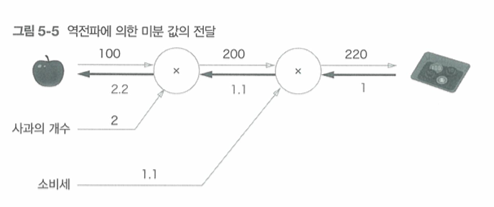

# 5.2 연쇄법칙
'국소적 미분'을 오른쪽에서 왼쪽으로 전달하는 원리를 연쇄법칙(chian rule)이라고 합니다.

## 5.2.1 계산 그래프의 역전파
$y = f(x)$라는 식의 역전파를 계산 그래프로 표현하면 다음과 같습니다.

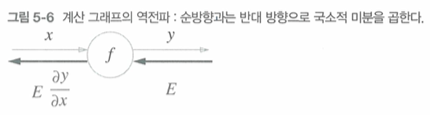

위의 그림과 같이 역전파의 계산 절차는 신호 E에 노드의 국소적 미분을 곱한 수 다음 노드로 전달하는 것입니다.

이러한 방식으로 역전파를 흘려보내는 것은 목표로 하는 미분 값을 효율적으로 구할 수 있다는 것이 이 전파의 핵심입니다.


## 5.2.2 연쇄법칙이란?
합성 함수란 여러 함수로 구성된 함수입니다.

예를 들어 $z = (x+y)^2$이라는 식은 다음과 같이 두 개의 식으로 나타낼 수 있습니다.


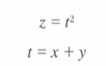

**합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다**는 합성 함수 미분에 대한 성질이 연쇄법칙입니다.

이를 수식으로 나타내면 다음과 같습니다.

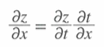

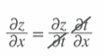

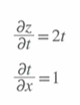

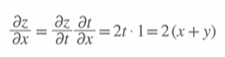

## 5.2.3 연쇄법칙과 계산 그래프
위 식을 계산 그래프로 나타내면 다음과 같습니다.

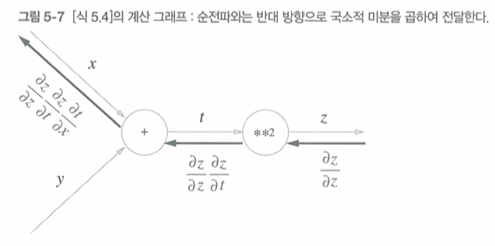

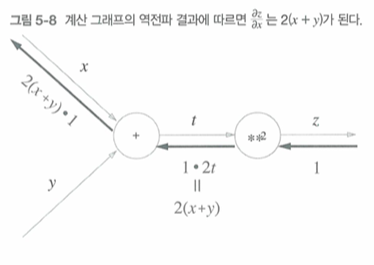

# 5.3 역전파


## 5.3.1 덧셈 노드의 역전파
$z = x+y$ 수식을 대상으로 역전파를 구하면 다음과 같습니다.

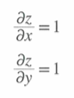

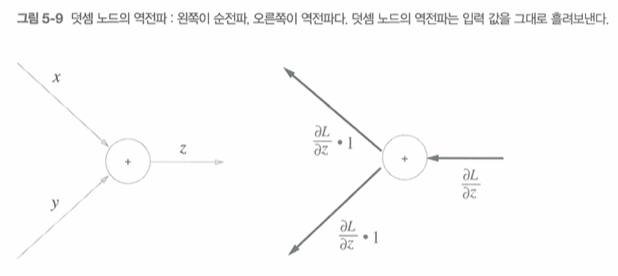

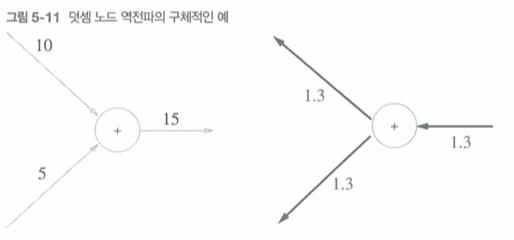

## 5.3.2 곱셈 노드의 역전파
$z = xy$ 수식을 대상으로 역전파를 구하면 다음과 같습니다.


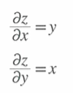

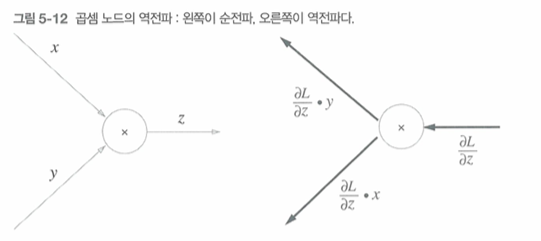

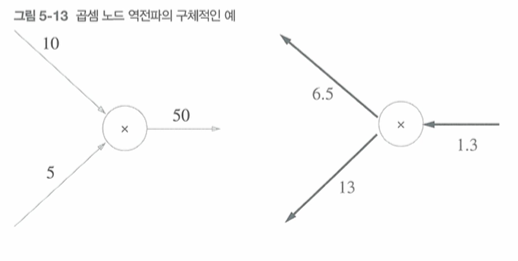

## 5.3.3 사과 쇼핑 예
사과 쇼핑 계산 그래프에 대한 역전파의 모습은 다음과 같습니다.

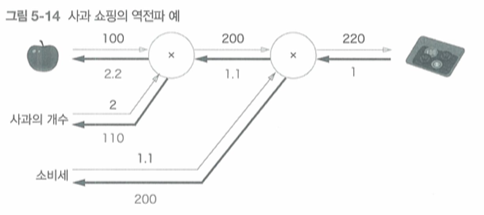

# 5.4 단순한 계층 구현하기


## 5.4.1 곱셈 계층
* forward() : 순전파
* backward() : 역전파


In [ ]:
class MulLayer:
  def __init__(self):
    self.x = None
    self.y = None
  
  def forward(self, x, y):
    self.x = x
    self.y = y
    out = x * y

    return out

  def backward(self, dout):
    dx = dout * self.y  # 곱셈 편미분
    dy = dout * self.x  # 곱셈 편미분

    return dx, dy 

다음은 아래 계산 그래프의 구현입니다.

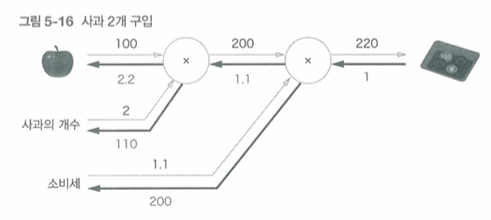

In [ ]:
apple = 100
apple_num = 2
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)


220.00000000000003


In [ ]:
# 역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


## 5.4.2 덧셈 계층

In [ ]:
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y
        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

다음은 아래 계산 그래프의 구현입니다.

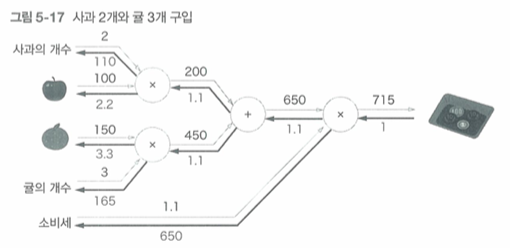

In [ ]:
orange = 150
orange_num = 3

# 계층들
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

print(price)  # 715.0

715.0000000000001


In [ ]:
# 역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dornage, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(price)
print(dapple_num, dapple, dornage, dorange_num, dtax)
# 110.0 2.2 3.3 165.0 650

715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


# 5.5 활성화 함수 계층 구현하기
* ReLU
* Sigmoid

## 5.5.1 ReLU 계층
* ReLU

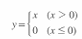

* ReLU 미분

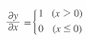

* ReLU 계산 그래프

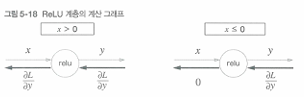

In [ ]:
class Relu:
  def __init__(self):
    self.mask = None
  
  def forward(self, x):
    self.mask = (x <= 0)
    out = x.copy()
    out[self.mask] = 0

    return out
  
  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout

    return dx
    

In [ ]:
# mask 출력해보기 
import numpy as np
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)
mask = (x <= 0)
print(mask)
# 0이하면 True, 0초과면 False

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


## 5.5.2 Sigmoid 계층

* Sigmoid 함수

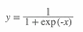

* Sigmoid 함수 계산 그래프

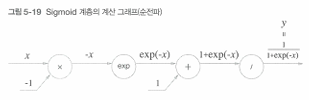

**1단계**
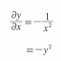

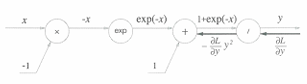


**2단계**

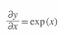

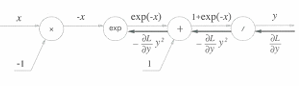

**3단계**

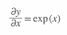

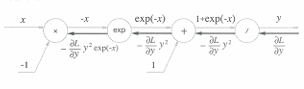

**4단계**

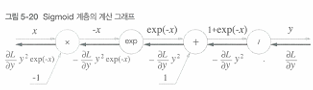

* Sigmoid 계층 계산 그래프 간소화 버전

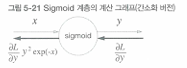

* Sigmoid 계층 최종 미분 값은 출력 y로만 이루어진 수식으로 다음과 같이 사용한다.

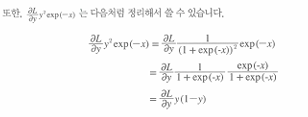

In [ ]:
class Sigmoid:
  def __init__(self):
    self.out = None
  
  def forward(self, x):
    out = 1 / (1 + np.exp(-x))
    self.out = out

    return out

  def backwward(self, dout):
    dx = dout * (1.0 - self.out) * self.out
  
    return dx

# 5.6 Affine/Softmax 계층 구현하기


## 5.6.1 Affine 계층

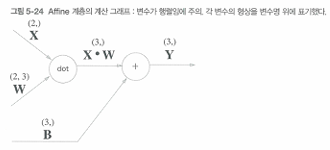

* 각각 X와 W에 대한 미분은 다음과 같습니다.

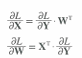

* $W^T$에서 T는 transpose로 전치행렬을 의미합니다.

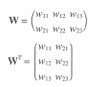


계산 그래프로 표현하면 다음과 같습니다.

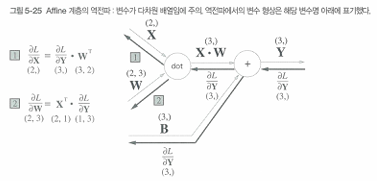

## 5.6.2 배치용 Affine 계층

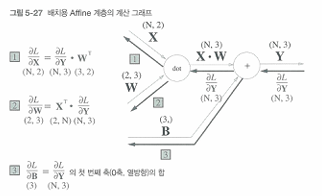

이는 단순히 데이터가 여러 개(N) 들어온 것뿐입니다.

이 때 편향을 더할 때 주의해야합니다. 편향이 각 데이터에 각각 더해집니다.

In [ ]:
# batch가 2일 때(데이터가 2개일 때) X, W dot 연산 결과
X_dot_W = np.array([[0,0,0], [10, 10, 10]])
B = np.array([1, 2, 3])

print(X_dot_W)
print(X_dot_W + B)

[[ 0  0  0]
 [10 10 10]]
[[ 1  2  3]
 [11 12 13]]


In [ ]:
# 편향의 역전파는 데이터에 대한 미분을 데이터마다 더해서 구한다
dY = np.array([[1, 2, 3], [4, 5, 6]])
print(dY)

dB = np.sum(dY, axis=0)
print(dB)

[[1 2 3]
 [4 5 6]]
[5 7 9]


Affine 구현

In [ ]:
class Affine:
  def __init__(self, W, b):
    self.W = W
    self.b = b
    self,x = None
    self.dW = None
    self.db = None

  def forward(self, x):
    self.x = x
    out = np.dot(x, self.W) + self

    return out

  def backward(self, dout):
    dx = np.dot(dout, self.W.T)
    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis = 0)

    return dx
    

## 5.6.3 Softmax-with-Loss 계층

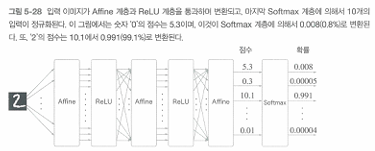

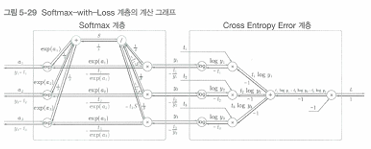

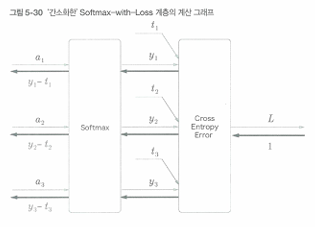

구현하기

In [ ]:
# softmax 함수 
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

# cross_entropy_error 함수
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

# softmax-with-Loss 계층
class SoftmaxWithLoss:
  def __init__(self):
    self.loss = None 
    self.y = None
    self.t = None
  
  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y, self.t)
    return self.loss

  def backward(self, dout=1):
    batch_size = self.t.shape[0]
    dx = (self.y - self.t) / batch_size

    return dx

# 5.7 오차역전파법 구현하기


## 5.7.1 신경망 학습의 전체 그림

* 전제
  - 신경망에는 적응가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라고 합니다. 
* 1단계 - 미니배치
  - 훈련 데이터 중 일부를 무작위로 가져옵니다.이렇게 선발한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표입니다.

* 2단계 - 기울기 산출
  - 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구합니다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시합니다.

* 3단계 - 매개변수 갱신
  - 가중치 매개변수를 기울기 방향에 의해 아주 조금 갱신합니다.

* 4단계 - 반복
  - 1~3단계를 반복합니다.

## 5.7.2 오차역전파법을 적용한 신경망 구현하기

In [ ]:
! git clone https://github.com/youbeebee/deeplearning_from_scratch.git
! mv ./deeplearning_from_scratch/common ./
! mv ./deeplearning_from_scratch/dataset ./

In [ ]:
import sys
import os
import numpy as np
from collections import OrderedDict
sys.path.append(os.pardir)
from common.layers import *
from common.gradient import numerical_gradient
from dataset.mnist import load_mnist

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size,
        weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = \
            Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = \
            Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1:
            t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        # 순전파
        self.loss(x, t)

        # 역전파
        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db

        return grads


## 5.7.3 오차역전파법으로 구한 기울기 검증하기

In [ ]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 차이의 절댓값을 구한 후, 그 절댓값들의 평균을 낸다.
for key in grad_numerical.keys():
  diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
  print(key + ":" + str(diff))

W1:2.8686680404686077e-13
b1:9.9578401730957e-13
W2:9.80859408993874e-13
b2:1.194599863474366e-10


## 5.7.4 오차역전파법을 사용한 학습 구현하기

In [33]:
import sys
import os
import numpy as np
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼 파라미터
iters_num = 10000  # 반복횟수
train_size = x_train.shape[0]
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # print(i)
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 오차역전파법으로 기울기 계산
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭 당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.09758333333333333, 0.0968
train acc, test acc | 0.9035833333333333, 0.9055
train acc, test acc | 0.9247666666666666, 0.9286
train acc, test acc | 0.9370166666666667, 0.9376
train acc, test acc | 0.94515, 0.9435
train acc, test acc | 0.9527666666666667, 0.9509
train acc, test acc | 0.9578833333333333, 0.9548
train acc, test acc | 0.9612833333333334, 0.9572
train acc, test acc | 0.9651166666666666, 0.9596
train acc, test acc | 0.9679833333333333, 0.9643
train acc, test acc | 0.9707333333333333, 0.9651
train acc, test acc | 0.9720833333333333, 0.9674
train acc, test acc | 0.9724833333333334, 0.9662
train acc, test acc | 0.9756166666666667, 0.9691
train acc, test acc | 0.9763666666666667, 0.9685
train acc, test acc | 0.9757, 0.9674
train acc, test acc | 0.97965, 0.9715


위의 학습 결과를 보면 학습이 진행됨에 따라 test acc가 점점 올라가는 것을 확인할 수 있다.